In [21]:
import os
import pickle
import test
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt


N = 20

def unpickle(import_w, N = N):
    pickles = []
    for path, subdirs, files in os.walk("greenf_ubc"):
        for name in files:
            pickles.append(os.path.join(path, name))
    
    pickles = [greenf.split("-") for greenf in pickles]
    pickles = ["-".join(greenf) for greenf in pickles if float(greenf[1].split("=")[1]) == import_w]
    predicted_values = defaultdict(list)
    true_values = defaultdict(list)
    for p in pickles:
        mapping, inv_mapping = test.index_triple_maps(N)
        with open(p, 'rb') as f:
            u = pickle._Unpickler(f)
            u.encoding = 'latin1'
            b = u.load()

        for key, value in b["predicted_value"].items():
            predicted_values[key].append(value)
        for key, value in b["true_value"].items():
            if key <= 10:
                true_values[key].append(value[0])
                
    return predicted_values, true_values



In [28]:
m, v = unpickle(1.25)

In [34]:
np.log(np.absolute(m[10]))[-10:]

/anaconda3/envs/greenf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[-5.04527947],
       [-5.74913152],
       [-6.31160895],
       [-4.57635365],
       [-4.28256087],
       [-4.90892594],
       [-5.07298802],
       [-4.79059494],
       [-5.79910892],
       [-4.50478336]])

In [33]:
np.log(np.absolute(v[10]))[-10:]

array([[-5.00207368],
       [-5.64969273],
       [-6.00848795],
       [-4.31565577],
       [-4.26033403],
       [-4.9004684 ],
       [-5.07099754],
       [-4.80506265],
       [-4.83558695],
       [-4.52693717]])

In [2]:
def localization_length(values_dict):
    """
    values_dict: dictionary where
        key = distance from boundary
        value = array containing calculated value of Green's function
    """
    means = {}
    for key, values in values_dict.items():
        values = np.hstack(values)
        values = values[values != 0] # remove -inf values in calculation
        values = np.absolute(values)
        values = np.log(values)
        means[key] = np.mean(values)
    return means



In [4]:
unpickle(1.25)

(defaultdict(list, {}), defaultdict(list, {}))

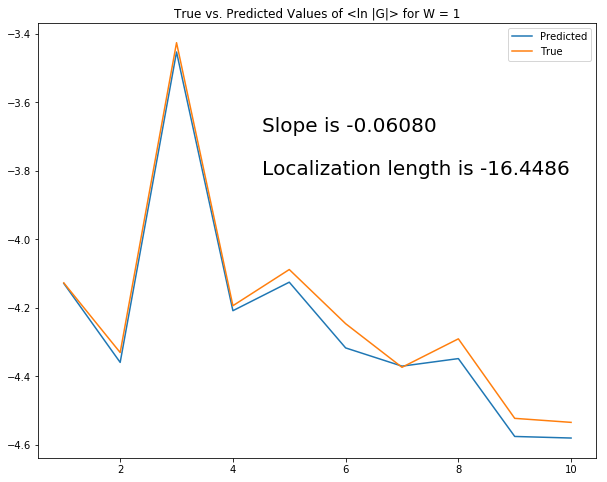

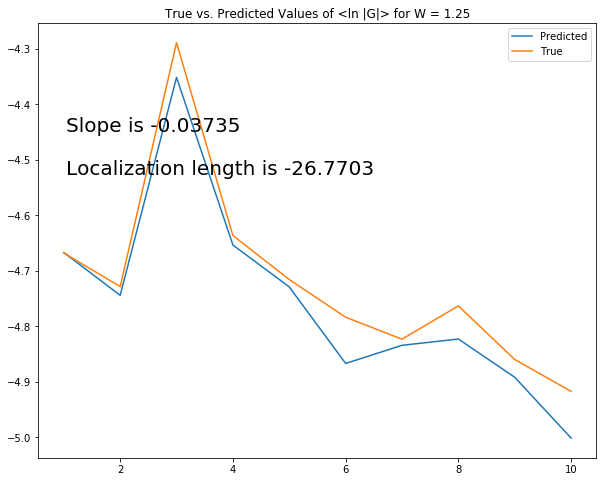

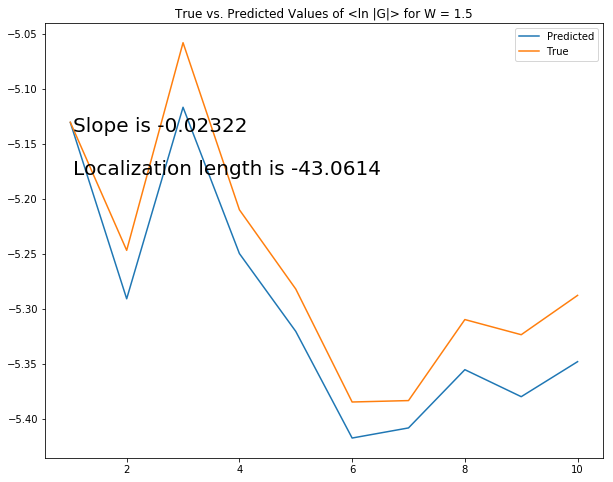

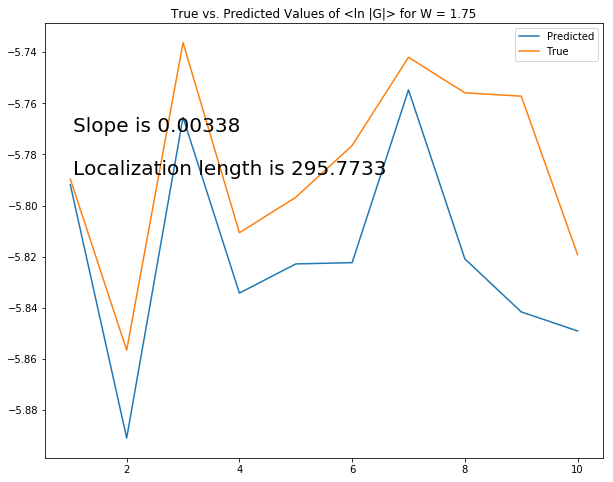

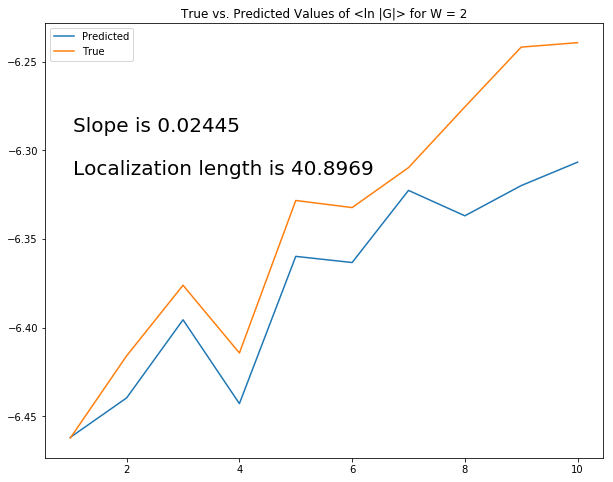

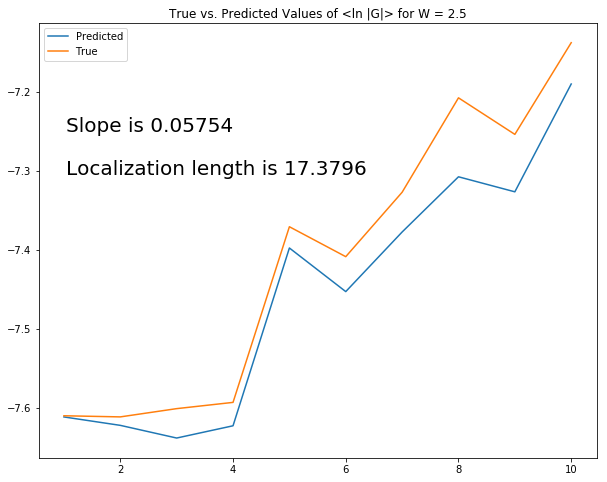

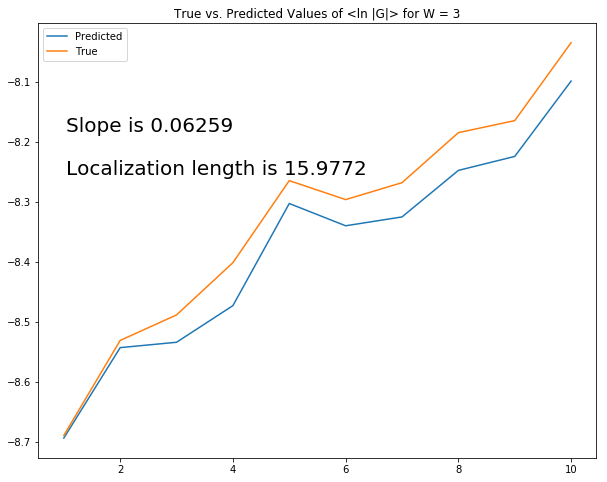

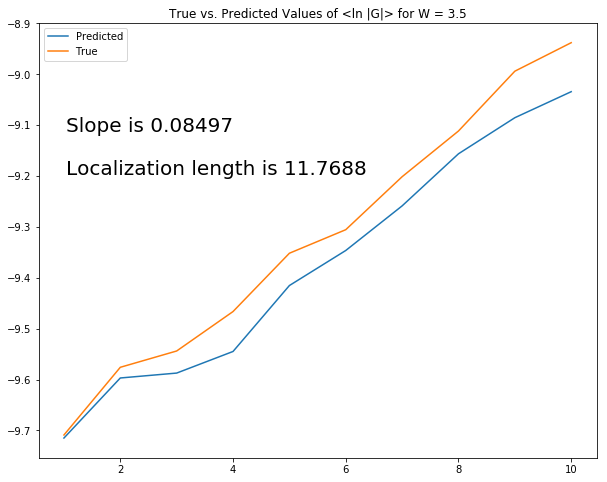

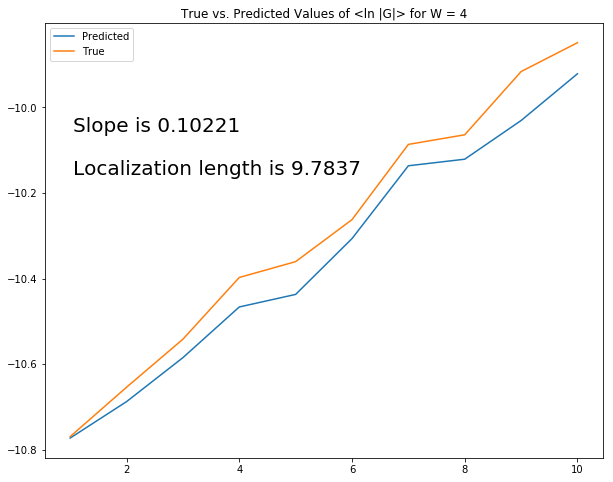

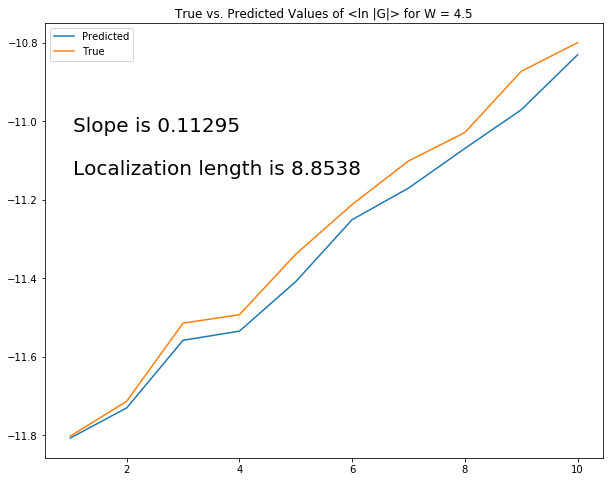

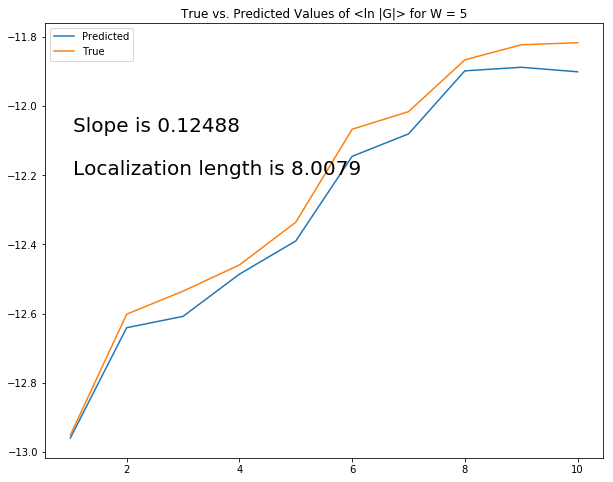

In [37]:
W_list = [1,1.25,1.5,1.75,2,2.5,3,3.5,4,4.5,5]
for import_w in W_list:
    predicted_values, true_values = unpickle(import_w)
    pred = (localization_length(predicted_values))
    true = (localization_length(true_values))
    pred_k, pred_v = (zip(*pred.items()))
    true_k, true_v = (zip(*true.items()))
    slope, _ = np.polyfit(true_k, true_v, 1)
#     print("Slope is", slope)
#     print("Localization length is", 1/slope)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    if import_w == 1:
        x, y = 0.4, 0.75
    else:
        x, y = 0.05, 0.75
    plt.text(x, y, "Slope is {:.5f}".format(float(slope)), fontsize=20, 
                 transform=ax.transAxes)
    plt.text(x, y - 0.1, "Localization length is {:.4f}".format(float(1/slope)), fontsize=20,
                 transform=ax.transAxes)
    ax.plot(pred_k, pred_v, label = "Predicted")
    ax.plot(true_k, true_v, label = "True")
    plt.legend(loc="best")
    plt.title("True vs. Predicted Values of <ln |G|> for W = {}".format(import_w))
    plt.show()

In [ ]:
k, v = (zip(*pred.items()))
k1, v1 = (zip(*true.items()))
import matplotlib.pyplot as plt
plt.plot(k, v)
plt.plot(k1, v1)

In [ ]:
# Overwrite the template for the 3rd category with the template for 1st category. 
# Python indexing begins at [0].
category_templates[2, :] = category_templates[0, :]

# Create the trial activity
trials = np.zeros((trial_types, repetitions_per_trial))
for category_counter in range(n_sim_categories):
    category_trials = np.random.randn(trials_per_category, repetitions_per_trial) * trial_noise
    for trial_counter in range(trials_per_category):
        trials[(trials_per_category * category_counter) + trial_counter, :] = category_templates[category_counter, :] + category_trials[trial_counter, :]

# Create the correlation matrix    
sim_r2 = np.corrcoef(trials)
plt.figure(figsize=(8, 8))
plt.imshow(sim_r2, interpolation='none', cmap='jet')
plt.colorbar()